In [1]:
import pandas as pd
import prefect
from prefect import task, Flow, Parameter
from prefect.triggers import all_successful, any_successful
from prefect.engine import signals
from zero import ZeroClient

In [2]:
client = ZeroClient("localhost", 5559)

In [3]:
def df_serialize(df):
    data = {}
    data['val'] = df.values.tolist()
    data['col'] = list(df.columns)
    data['ind'] = list(df.index)
    return data

def df_deserialize(data):
    return pd.DataFrame(data['val'], columns = data['col'], index = data['ind'])

@task
def load_data(data_id):
    df = client.call("load_data", data_id)
    return df

def privacy_sig_handler(obj, old_state, new_state):
    if new_state.is_failed():
        with open("privacy_violation.txt", 'w') as f:
            f.write("privacy violation alert!")
    return new_state

@task(state_handlers=[privacy_sig_handler])
def get_mean(df, col):
    try:
        res = client.call("get_mean", (df, col))
    except Exception as e:
        raise signals.FAIL(str(e))
        #raise signals.SKIP(str(e))
    return res

@task
def get_size(df):
    return client.call("get_size", df)

@task(name = "fed_mean", trigger= all_successful, skip_on_upstream_skip=False)
def agg_mean(mean_vals, sizes):
    mean_vals = [val for val in mean_vals if val is not None]
    return client.call("agg_mean", (mean_vals, sizes))

In [4]:
with Flow("fed_mean") as flow:
    col_label = Parameter('col_label', default = "AGE")
    means = []
    lens = []
    for i in range(3):
        df = load_data(i+1)
        means.append(get_mean(df, col = col_label))
        lens.append(get_size(df))
    res = agg_mean(means, lens)

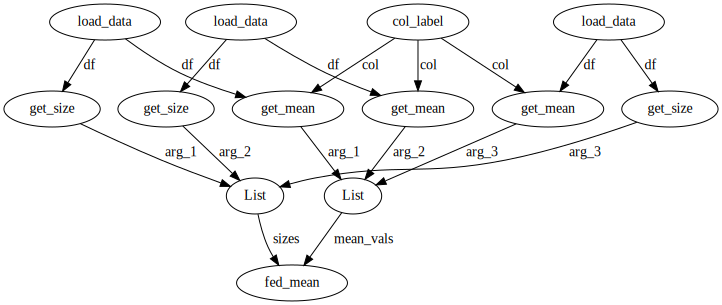

In [5]:
flow.visualize()

In [6]:
state = flow.run()

[2022-06-03 00:41:29-0400] INFO - prefect.FlowRunner | Beginning Flow run for 'fed_mean'


03-Jun-22 00:41:29  INFO  1539771  flow_runner > Beginning Flow run for 'fed_mean'


[2022-06-03 00:41:29-0400] INFO - prefect.TaskRunner | Task 'load_data': Starting task run...


03-Jun-22 00:41:29  INFO  1539771  task_runner > Task 'load_data': Starting task run...


[2022-06-03 00:41:29-0400] INFO - prefect.TaskRunner | Task 'load_data': Finished task run for task with final state: 'Success'


03-Jun-22 00:41:29  INFO  1539771  task_runner > Task 'load_data': Finished task run for task with final state: 'Success'


[2022-06-03 00:41:29-0400] INFO - prefect.TaskRunner | Task 'load_data': Starting task run...


03-Jun-22 00:41:29  INFO  1539771  task_runner > Task 'load_data': Starting task run...


[2022-06-03 00:41:29-0400] INFO - prefect.TaskRunner | Task 'load_data': Finished task run for task with final state: 'Success'


03-Jun-22 00:41:29  INFO  1539771  task_runner > Task 'load_data': Finished task run for task with final state: 'Success'


[2022-06-03 00:41:29-0400] INFO - prefect.TaskRunner | Task 'get_size': Starting task run...


03-Jun-22 00:41:29  INFO  1539771  task_runner > Task 'get_size': Starting task run...


[2022-06-03 00:41:29-0400] INFO - prefect.TaskRunner | Task 'get_size': Finished task run for task with final state: 'Success'


03-Jun-22 00:41:29  INFO  1539771  task_runner > Task 'get_size': Finished task run for task with final state: 'Success'


[2022-06-03 00:41:29-0400] INFO - prefect.TaskRunner | Task 'get_size': Starting task run...


03-Jun-22 00:41:29  INFO  1539771  task_runner > Task 'get_size': Starting task run...


[2022-06-03 00:41:29-0400] INFO - prefect.TaskRunner | Task 'get_size': Finished task run for task with final state: 'Success'


03-Jun-22 00:41:29  INFO  1539771  task_runner > Task 'get_size': Finished task run for task with final state: 'Success'


[2022-06-03 00:41:29-0400] INFO - prefect.TaskRunner | Task 'col_label': Starting task run...


03-Jun-22 00:41:29  INFO  1539771  task_runner > Task 'col_label': Starting task run...


[2022-06-03 00:41:29-0400] INFO - prefect.TaskRunner | Task 'col_label': Finished task run for task with final state: 'Success'


03-Jun-22 00:41:29  INFO  1539771  task_runner > Task 'col_label': Finished task run for task with final state: 'Success'


[2022-06-03 00:41:29-0400] INFO - prefect.TaskRunner | Task 'load_data': Starting task run...


03-Jun-22 00:41:29  INFO  1539771  task_runner > Task 'load_data': Starting task run...


[2022-06-03 00:41:29-0400] INFO - prefect.TaskRunner | Task 'load_data': Finished task run for task with final state: 'Success'


03-Jun-22 00:41:29  INFO  1539771  task_runner > Task 'load_data': Finished task run for task with final state: 'Success'


[2022-06-03 00:41:29-0400] INFO - prefect.TaskRunner | Task 'get_mean': Starting task run...


03-Jun-22 00:41:29  INFO  1539771  task_runner > Task 'get_mean': Starting task run...


[2022-06-03 00:41:29-0400] INFO - prefect.TaskRunner | Task 'get_mean': Finished task run for task with final state: 'Success'


03-Jun-22 00:41:29  INFO  1539771  task_runner > Task 'get_mean': Finished task run for task with final state: 'Success'


[2022-06-03 00:41:29-0400] INFO - prefect.TaskRunner | Task 'get_mean': Starting task run...


03-Jun-22 00:41:29  INFO  1539771  task_runner > Task 'get_mean': Starting task run...


[2022-06-03 00:41:29-0400] INFO - prefect.TaskRunner | Task 'get_mean': Finished task run for task with final state: 'Success'


03-Jun-22 00:41:29  INFO  1539771  task_runner > Task 'get_mean': Finished task run for task with final state: 'Success'


[2022-06-03 00:41:29-0400] INFO - prefect.TaskRunner | Task 'get_size': Starting task run...


03-Jun-22 00:41:29  INFO  1539771  task_runner > Task 'get_size': Starting task run...


[2022-06-03 00:41:29-0400] INFO - prefect.TaskRunner | Task 'get_size': Finished task run for task with final state: 'Success'


03-Jun-22 00:41:29  INFO  1539771  task_runner > Task 'get_size': Finished task run for task with final state: 'Success'


[2022-06-03 00:41:29-0400] INFO - prefect.TaskRunner | Task 'List': Starting task run...


03-Jun-22 00:41:29  INFO  1539771  task_runner > Task 'List': Starting task run...


[2022-06-03 00:41:29-0400] INFO - prefect.TaskRunner | Task 'List': Finished task run for task with final state: 'Success'


03-Jun-22 00:41:29  INFO  1539771  task_runner > Task 'List': Finished task run for task with final state: 'Success'


[2022-06-03 00:41:29-0400] INFO - prefect.TaskRunner | Task 'get_mean': Starting task run...


03-Jun-22 00:41:29  INFO  1539771  task_runner > Task 'get_mean': Starting task run...


[2022-06-03 00:41:29-0400] INFO - prefect.TaskRunner | Task 'get_mean': Finished task run for task with final state: 'Success'


03-Jun-22 00:41:29  INFO  1539771  task_runner > Task 'get_mean': Finished task run for task with final state: 'Success'


[2022-06-03 00:41:29-0400] INFO - prefect.TaskRunner | Task 'List': Starting task run...


03-Jun-22 00:41:29  INFO  1539771  task_runner > Task 'List': Starting task run...


[2022-06-03 00:41:29-0400] INFO - prefect.TaskRunner | Task 'List': Finished task run for task with final state: 'Success'


03-Jun-22 00:41:29  INFO  1539771  task_runner > Task 'List': Finished task run for task with final state: 'Success'


[2022-06-03 00:41:29-0400] INFO - prefect.TaskRunner | Task 'fed_mean': Starting task run...


03-Jun-22 00:41:29  INFO  1539771  task_runner > Task 'fed_mean': Starting task run...


[2022-06-03 00:41:29-0400] INFO - prefect.TaskRunner | Task 'fed_mean': Finished task run for task with final state: 'Success'


03-Jun-22 00:41:29  INFO  1539771  task_runner > Task 'fed_mean': Finished task run for task with final state: 'Success'


[2022-06-03 00:41:29-0400] INFO - prefect.FlowRunner | Flow run SUCCESS: all reference tasks succeeded


03-Jun-22 00:41:29  INFO  1539771  flow_runner > Flow run SUCCESS: all reference tasks succeeded


In [7]:
state.result

{<Task: load_data>: <Success: "Task run succeeded.">,
 <Task: load_data>: <Success: "Task run succeeded.">,
 <Task: get_size>: <Success: "Task run succeeded.">,
 <Task: get_mean>: <Success: "Task run succeeded.">,
 <Task: get_size>: <Success: "Task run succeeded.">,
 <Task: get_mean>: <Success: "Task run succeeded.">,
 <Task: get_size>: <Success: "Task run succeeded.">,
 <Task: List>: <Success: "Task run succeeded.">,
 <Task: get_mean>: <Success: "Task run succeeded.">,
 <Parameter: col_label>: <Success: "Task run succeeded.">,
 <Task: load_data>: <Success: "Task run succeeded.">,
 <Task: fed_mean>: <Success: "Task run succeeded.">,
 <Task: List>: <Success: "Task run succeeded.">}

In [8]:
t = flow.get_tasks(name = "fed_mean")[0]
state.result[t].result

50.75888888888889

In [9]:
state = flow.run(parameters = dict(col_label = "BMI"))

[2022-06-03 00:41:33-0400] INFO - prefect.FlowRunner | Beginning Flow run for 'fed_mean'


03-Jun-22 00:41:33  INFO  1539771  flow_runner > Beginning Flow run for 'fed_mean'


[2022-06-03 00:41:33-0400] INFO - prefect.TaskRunner | Task 'load_data': Starting task run...


03-Jun-22 00:41:33  INFO  1539771  task_runner > Task 'load_data': Starting task run...


[2022-06-03 00:41:33-0400] INFO - prefect.TaskRunner | Task 'load_data': Finished task run for task with final state: 'Success'


03-Jun-22 00:41:33  INFO  1539771  task_runner > Task 'load_data': Finished task run for task with final state: 'Success'


[2022-06-03 00:41:33-0400] INFO - prefect.TaskRunner | Task 'load_data': Starting task run...


03-Jun-22 00:41:33  INFO  1539771  task_runner > Task 'load_data': Starting task run...


[2022-06-03 00:41:33-0400] INFO - prefect.TaskRunner | Task 'load_data': Finished task run for task with final state: 'Success'


03-Jun-22 00:41:33  INFO  1539771  task_runner > Task 'load_data': Finished task run for task with final state: 'Success'


[2022-06-03 00:41:33-0400] INFO - prefect.TaskRunner | Task 'get_size': Starting task run...


03-Jun-22 00:41:33  INFO  1539771  task_runner > Task 'get_size': Starting task run...


[2022-06-03 00:41:33-0400] INFO - prefect.TaskRunner | Task 'get_size': Finished task run for task with final state: 'Success'


03-Jun-22 00:41:33  INFO  1539771  task_runner > Task 'get_size': Finished task run for task with final state: 'Success'


[2022-06-03 00:41:33-0400] INFO - prefect.TaskRunner | Task 'get_size': Starting task run...


03-Jun-22 00:41:33  INFO  1539771  task_runner > Task 'get_size': Starting task run...


[2022-06-03 00:41:33-0400] INFO - prefect.TaskRunner | Task 'get_size': Finished task run for task with final state: 'Success'


03-Jun-22 00:41:33  INFO  1539771  task_runner > Task 'get_size': Finished task run for task with final state: 'Success'


[2022-06-03 00:41:33-0400] INFO - prefect.TaskRunner | Task 'col_label': Starting task run...


03-Jun-22 00:41:33  INFO  1539771  task_runner > Task 'col_label': Starting task run...


[2022-06-03 00:41:33-0400] INFO - prefect.TaskRunner | Task 'col_label': Finished task run for task with final state: 'Success'


03-Jun-22 00:41:33  INFO  1539771  task_runner > Task 'col_label': Finished task run for task with final state: 'Success'


[2022-06-03 00:41:33-0400] INFO - prefect.TaskRunner | Task 'load_data': Starting task run...


03-Jun-22 00:41:33  INFO  1539771  task_runner > Task 'load_data': Starting task run...


[2022-06-03 00:41:33-0400] INFO - prefect.TaskRunner | Task 'load_data': Finished task run for task with final state: 'Success'


03-Jun-22 00:41:33  INFO  1539771  task_runner > Task 'load_data': Finished task run for task with final state: 'Success'


[2022-06-03 00:41:33-0400] INFO - prefect.TaskRunner | Task 'get_mean': Starting task run...


03-Jun-22 00:41:33  INFO  1539771  task_runner > Task 'get_mean': Starting task run...


[2022-06-03 00:41:33-0400] INFO - prefect.TaskRunner | Task 'get_mean': Finished task run for task with final state: 'Success'


03-Jun-22 00:41:33  INFO  1539771  task_runner > Task 'get_mean': Finished task run for task with final state: 'Success'


[2022-06-03 00:41:33-0400] INFO - prefect.TaskRunner | Task 'get_mean': Starting task run...


03-Jun-22 00:41:33  INFO  1539771  task_runner > Task 'get_mean': Starting task run...


[2022-06-03 00:41:33-0400] INFO - prefect.TaskRunner | Task 'get_mean': Finished task run for task with final state: 'Success'


03-Jun-22 00:41:33  INFO  1539771  task_runner > Task 'get_mean': Finished task run for task with final state: 'Success'


[2022-06-03 00:41:33-0400] INFO - prefect.TaskRunner | Task 'get_size': Starting task run...


03-Jun-22 00:41:33  INFO  1539771  task_runner > Task 'get_size': Starting task run...


[2022-06-03 00:41:33-0400] INFO - prefect.TaskRunner | Task 'get_size': Finished task run for task with final state: 'Success'


03-Jun-22 00:41:33  INFO  1539771  task_runner > Task 'get_size': Finished task run for task with final state: 'Success'


[2022-06-03 00:41:33-0400] INFO - prefect.TaskRunner | Task 'List': Starting task run...


03-Jun-22 00:41:33  INFO  1539771  task_runner > Task 'List': Starting task run...


[2022-06-03 00:41:33-0400] INFO - prefect.TaskRunner | Task 'List': Finished task run for task with final state: 'Success'


03-Jun-22 00:41:33  INFO  1539771  task_runner > Task 'List': Finished task run for task with final state: 'Success'


[2022-06-03 00:41:33-0400] INFO - prefect.TaskRunner | Task 'get_mean': Starting task run...


03-Jun-22 00:41:33  INFO  1539771  task_runner > Task 'get_mean': Starting task run...


[2022-06-03 00:41:33-0400] INFO - prefect.TaskRunner | Task 'get_mean': Finished task run for task with final state: 'Success'


03-Jun-22 00:41:33  INFO  1539771  task_runner > Task 'get_mean': Finished task run for task with final state: 'Success'


[2022-06-03 00:41:33-0400] INFO - prefect.TaskRunner | Task 'List': Starting task run...


03-Jun-22 00:41:33  INFO  1539771  task_runner > Task 'List': Starting task run...


[2022-06-03 00:41:33-0400] INFO - prefect.TaskRunner | Task 'List': Finished task run for task with final state: 'Success'


03-Jun-22 00:41:33  INFO  1539771  task_runner > Task 'List': Finished task run for task with final state: 'Success'


[2022-06-03 00:41:33-0400] INFO - prefect.TaskRunner | Task 'fed_mean': Starting task run...


03-Jun-22 00:41:33  INFO  1539771  task_runner > Task 'fed_mean': Starting task run...


[2022-06-03 00:41:33-0400] INFO - prefect.TaskRunner | Task 'fed_mean': Finished task run for task with final state: 'Success'


03-Jun-22 00:41:33  INFO  1539771  task_runner > Task 'fed_mean': Finished task run for task with final state: 'Success'


[2022-06-03 00:41:33-0400] INFO - prefect.FlowRunner | Flow run SUCCESS: all reference tasks succeeded


03-Jun-22 00:41:33  INFO  1539771  flow_runner > Flow run SUCCESS: all reference tasks succeeded


In [10]:
t = flow.get_tasks(name = "fed_mean")[0]
state.result[t].result

24.552666666666667